In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

%matplotlib inline

In [2]:
faceCascade = cv2.CascadeClassifier(r'C:\Users\viren\StarAgile\Computer Vision\haarcascade_frontalface_default.xml')

In [3]:
type(faceCascade)

cv2.CascadeClassifier

(-0.5, 899.5, 899.5, -0.5)

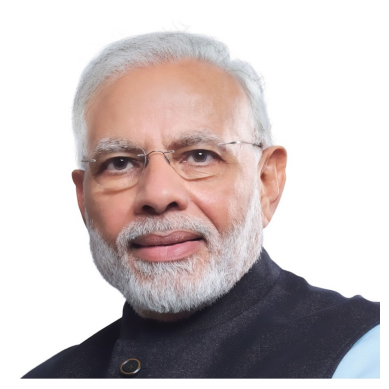

In [4]:
img = cv2.imread('modiji.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [5]:
img.shape

(900, 900, 3)

(-0.5, 899.5, 899.5, -0.5)

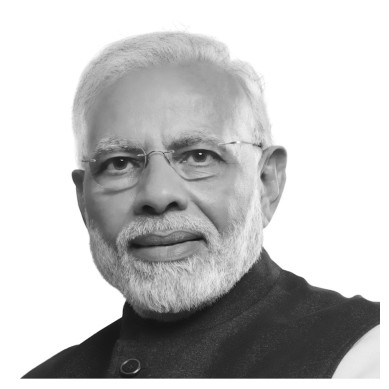

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, 'gray')
plt.axis('off')

In [7]:
# Detects the face and gives coordinates of box where face is present in the image
faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)

In [8]:
print(type(faces))
print(faces.shape)
print(faces)

<class 'numpy.ndarray'>
(1, 4)
[[132 184 477 477]]


(-0.5, 899.5, 899.5, -0.5)

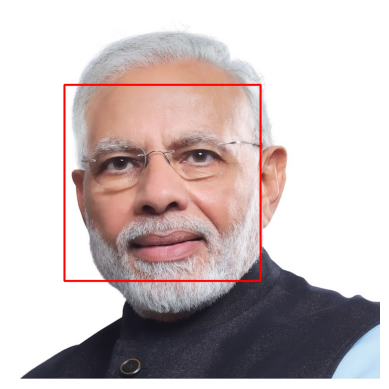

In [9]:
# drawing a bounding box
cv2.rectangle(img, (132, 184), (132+477, 184+477), (255,0,0), 4)
plt.imshow(img)
plt.axis('off')

<class 'numpy.ndarray'>
(1, 4)
[[161 206 718 718]]


(-0.5, 1077.5, 1279.5, -0.5)

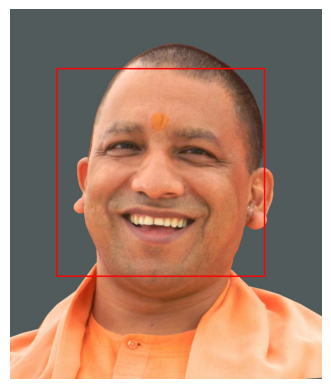

In [11]:
yogi = cv2.imread('yogi.jpg')
yogi = cv2.cvtColor(yogi, cv2.COLOR_BGR2RGB)
yogi_gray = cv2.cvtColor(yogi, cv2.COLOR_BGR2GRAY)
plt.imshow(yogi_gray)
plt.axis('off')

faces1 = faceCascade.detectMultiScale(yogi, 1.2, 4)
print(type(faces1))
print(faces1.shape)
print(faces1)
(x,y,h,w) = faces1[0]
cv2.rectangle(yogi, (x, y), (x+w, y+h), (255,0,0), 4)
plt.imshow(yogi)
plt.axis('off')

In [12]:
# or you can also write


In [13]:
team = cv2.imread('team.jpg')
team = cv2.cvtColor(team, cv2.COLOR_BGR2RGB)
team_gray = cv2.cvtColor(team, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(team_gray, 1.2, 4)
(x,y,h,w) = faces[0]

(-0.5, 3354.5, 1886.5, -0.5)

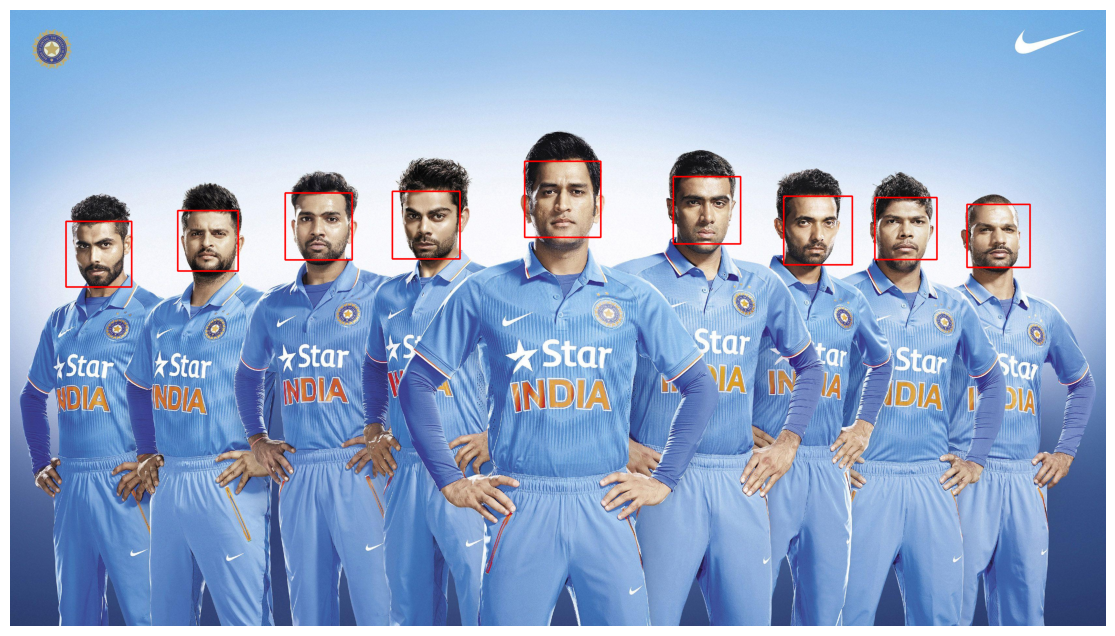

In [14]:
for x, y, w, h in faces:
    cv2.rectangle(team, (x, y), (x+w, y+h), (255,0,0), 4)
plt.figure(figsize = (16,8))
plt.imshow(team)
plt.axis('off')

<class 'numpy.ndarray'>
(2, 4)
[[759 160 358 358]
 [818 762 104 104]]


(-0.5, 1919.5, 1079.5, -0.5)

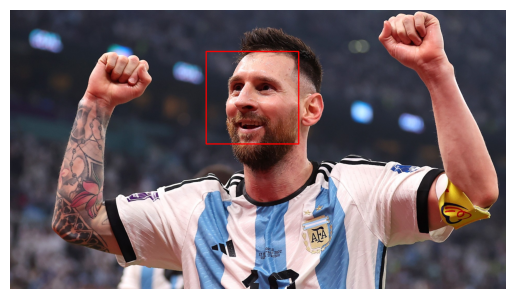

In [15]:
messi = cv2.imread('messi.jpg')
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)
messi_gray = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)

faces = faceCascade.detectMultiScale(messi_gray, 1.2, 4)
print(type(faces))
print(faces.shape)
print(faces)
(x,y,h,w) = faces[0]
cv2.rectangle(messi, (x, y), (x+w, y+h), (255,0,0), 4)
plt.imshow(messi)
plt.axis('off')

<class 'numpy.ndarray'>
(2, 4)
[[759 160 358 358]
 [818 762 104 104]]


(-0.5, 1919.5, 1079.5, -0.5)

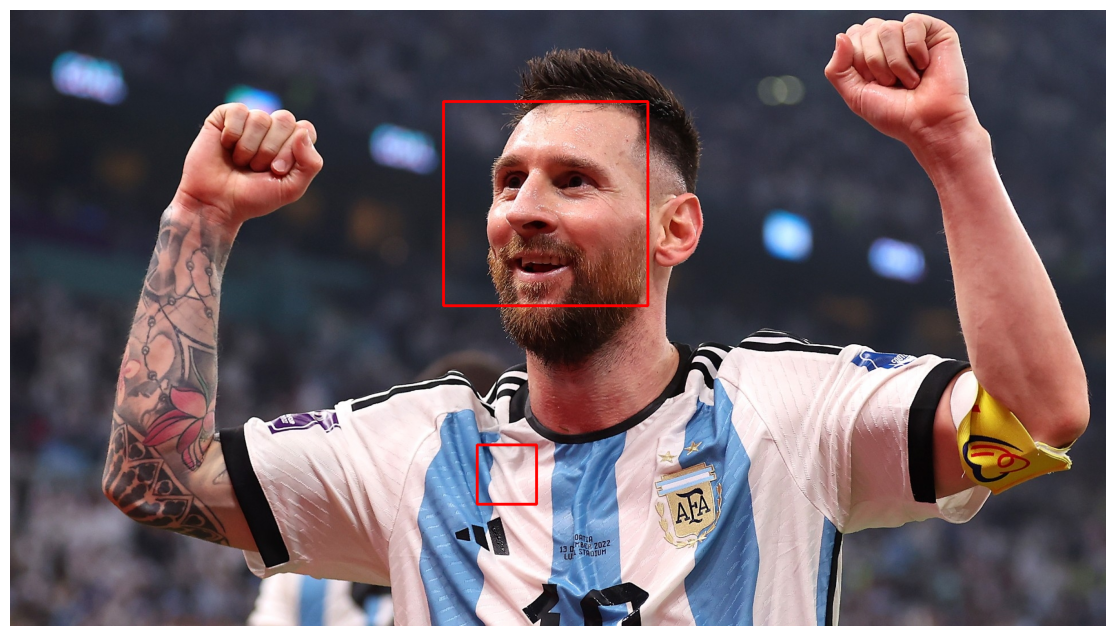

In [16]:
messi = cv2.imread('messi.jpg')
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)
messi_gray = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)

faces = faceCascade.detectMultiScale(messi_gray, 1.2, 4)
print(type(faces))
print(faces.shape)
print(faces)
(x,y,h,w) = faces[0]

for x, y, w, h in faces:
    cv2.rectangle(messi, (x, y), (x+w, y+h), (255,0,0), 4)
plt.figure(figsize = (16,8))
plt.imshow(messi)
plt.axis('off')

(-0.5, 471.5, 471.5, -0.5)

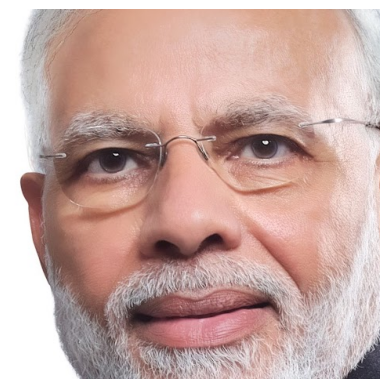

In [41]:
# Example 2
img = cv2.imread('modiji.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
(x,y,w,h) = faces[0]
face_cropped = img[y : y+h, x : x+w]
plt.imshow(face_cropped)
plt.axis('off')

In [42]:
# saving the file
cv2.imwrite('faces/modiji_face.jpg', cv2.cvtColor(face_cropped, cv2.COLOR_BGR2RGB))

True

# --------------------------------------------------------------------------------------------------------------

In [26]:
# Creating a function to detect face

def detect_face (image_path):
    '''
    Input : Path to an image
    Output : Image with bouding boxed around faces
    '''
    img = cv2.imread(image_path)                                   # read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                     # convert to rgb
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)               # create a grayscale image
    
    # create a cascade classifier and use detectMultiScale fucntion
    faceCascade = cv2.CascadeClassifier(r'C:\Users\viren\StarAgile\Computer Vision\haarcascade_frontalface_default.xml')
    face = faceCascade.detectMultiScale(img_gray, 1.2,4)
    
    # Draw the Bounding boxes
    for  (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 5)
        
    return img

(-0.5, 899.5, 899.5, -0.5)

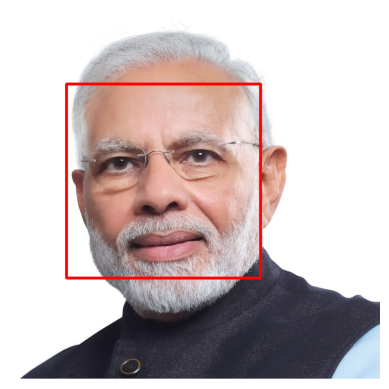

In [27]:
image = detect_face('modiji.jpg')
plt.imshow(image)
plt.axis('off')

In [50]:
# creating a function to crop the face and save it
def save_cropped_face(image_path, save_path):
    img = cv2.imread(image_path)                                   # read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                     # convert to rgb
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)               # create a grayscale image
    
    # create a cascade classifier and use detectMultiScale fucntion
    faceCascade = cv2.CascadeClassifier(r'C:\Users\viren\StarAgile\Computer Vision\haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(img_gray, 1.2,4)
    
    # Draw the Bounding boxes
    i = 1
    for  (x, y, w, h) in faces:
        face = img[y : y+h, x : x+w]
        cv2.imwrite(save_path + '/face{}.jpg'.format(i), cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        i += 1 

In [51]:
save_cropped_face('team.jpg', 'faces')